In [1]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.collections import LineCollection
import seaborn as sns
import pandas as pd

[Python - Plotting colored grid based on values](https://stackoverflow.com/a/43971236/12224183)

```python
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));

plt.show()
```

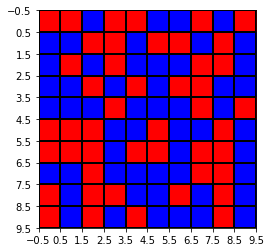

In [2]:
data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));

# Plot Map with Neighbor

In [3]:
lines = []
xs = []
ys = []
tps = []
lines4points = []
raw_nbrses = []
blk_nbrses = []
with open ('data/map.csv','r') as csv_file:
    reader =csv.reader(csv_file)
    for i, line in enumerate(reader):
        if i == 0:
            print(line)
        elif i == 1:
            x_lim, y_lim = int(line[1]), int(line[2])
            print('size: {} x {}'.format(y_lim, x_lim))
            board = -1 * np.ones([y_lim, x_lim], dtype=int)
        else:
#             if i == 611:  # 611, 612, first red point
#                 break
            tp, x, y, raw_nbrs = int(line[0]), int(line[1]), int(line[2]), line[3]
            tps.append(tp)
            xs.append(x)
            ys.append(y)
            board[y_lim - y - 1, x] = tp
            if not raw_nbrs:
                lines4points.append([])
                raw_nbrses.append([])
                blk_nbrses.append([])
                continue
            raw_nbrs = {_ for _ in raw_nbrs.split(';')}  # like {'2:0', '3:1', '4:0'}
            raw_nbrses.append(raw_nbrs)
            nbrs = set()
            for nbr in raw_nbrs:
                nx, ny = nbr.split(':')
                nbrs.add((int(nx), int(ny)))
                
#             all_nbrs = {str(x) + ':' + str(y + 1), str(x) + ':' + str(y - 1),
#                         str(x - 1) + ':' + str(y), str(x - 1) + ':' + str(y)}
            all_nbrs = {(x, y + 1), (x, y - 1), (x - 1, y), (x + 1, y)}
            blk_nbrs = all_nbrs - nbrs
            blk_nbrses.append(blk_nbrs)
            lines4point = []
            for nbr in blk_nbrs:
                nx, ny = nbr
                if x == nx:
                    line = [(x + 0.5, y_lim - 1 - (y + ny) / 2), (x - 0.5, y_lim - 1 - (y + ny) / 2)]
                    lines.append(line)  # y should be substracted by y_limit - 1
                    lines4point.append(line)
                elif y == ny:
                    line = [((x + nx) / 2, y_lim - 1 - y + 0.5), ((x + nx) / 2, y_lim - 1 - y - 0.5)]
                    lines.append(line)
                    lines4point.append(line)
                else:
                    assert False, 'x: {}, y:{}, nbrs: {}'.format(x, y, nbrs)
            lines4points.append(lines4point)

['#TYPE', ' X', ' Y', ' NEIGHBORS']
size: 22 x 32


In [28]:
pallets[' PALLET_ID']==10000

0       True
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Name:  PALLET_ID, Length: 148, dtype: bool

In [48]:
pallets = pd.read_csv('data/pallets.csv')
pallets, pallets.loc[pallets[' PALLET_ID'] == 10000, ' X']

(                  #SKU_QUANTITY_LIST   X   Y   PALLET_ID
 0       104151:9,840211:35,1297235:1  18   8       10000
 1    901897:13,1297235:18,2171945:14  19  16       10001
 2                          653296:69  14  12       10002
 3                         1473101:66  18  15       10003
 4                961380:8,1187577:49  14   6       10004
 ..                               ...  ..  ..         ...
 143            1751060:20,2247923:14  24  15       10143
 144             582599:33,1766481:54  13   5       10144
 145             2302238:2,1867146:34  12   6       10145
 146             1286521:31,901902:24  12  13       10146
 147             1308094:52,1085002:4   9  12       10147
 
 [148 rows x 4 columns],
 0    18
 Name:  X, dtype: int64)

In [50]:
agv = pd.read_csv('data/agv.csv')
agv, len(agv)

(    #AGV_ID   X   Y
 0         1  31  14
 1         2  26  11
 2         3  29  16
 3         4   5   7
 4         5  27  18
 5         6  22  10
 6         7   9  20
 7         8  14  17
 8         9   8  11
 9        10  19  18
 10       11  25   6
 11       12   9   7
 12       13  11  16
 13       14  17   8
 14       15   0   5
 15       16   3  16
 16       17  24  15
 17       18  20   4
 18       19   4   0
 19       20   1  14,
 20)

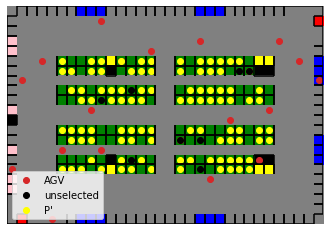

In [57]:
fig, ax = plt.subplots()

# plot map
cmap = colors.ListedColormap(['gray', 'green', 'yellow', 'black', 'blue', 'pink', 'red'])
bounds = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
norm = colors.BoundaryNorm(bounds, cmap.N)
ax.imshow(board, cmap=cmap, norm=norm)

# plot lines
lc = LineCollection(lines, colors=['black'] * len(lines))
ax.add_collection(lc)

# agv
x = agv['X']
y = [y_lim - 1 - _ for _ in agv['Y']]
plt.scatter(x, y, color='tab:red', label='AGV')

# unselected: 69, 140, 141, 142, 143, 145, 146, 147
x = [pallets.loc[_, ' X'] for _ in [69, 140, 141, 142, 143, 145, 146, 147]]
y = [y_lim - 1 - pallets.loc[_, ' Y'] for _ in [69, 140, 141, 142, 143, 145, 146, 147]]
plt.scatter(x, y, color='black', label='unselected')

# P_prime
P_prime = {'10074', '10022', '10108', '10017', '10033', '10102', '10044', '10125', '10136', '10023', '10094', '10063', '10065', '10106', '10009', '10099', '10019', '10109', '10021', '10006', '10034', '10124', '10068', '10053', '10110', '10058', '10091', '10107', '10029', '10024', '10132', '10049', '10050', '10131', '10104', '10047', '10105', '10119', '10067', '10040', '10018', '10057', '10137', '10113', '10112', '10039', '10071', '10061', '10020', '10010', '10055', '10032', '10079', '10080', '10120', '10030', '10096', '10026', '10133', '10092', '10090', '10130', '10001', '10103', '10060', '10008', '10135', '10101', '10015', '10081', '10097', '10046', '10128', '10095', '10056', '10076', '10052', '10129', '10005', '10025', '10093', '10122', '10048', '10041', '10064', '10013', '10111', '10114', '10078', '10100', '10116', '10138', '10045', '10066', '10012', '10098', '10134'}
pallets.loc[pallets[' PALLET_ID'] == 10000, ' X']
x = [pallets.loc[pallets[' PALLET_ID'] == int(_), ' X'] for _ in P_prime]
y = [y_lim - 1 - pallets.loc[pallets[' PALLET_ID'] == int(_), ' Y'] for _ in P_prime]
plt.scatter(x, y, color='yellow', label='P\'')

plt.legend(loc='best')
plt.axis('off')

plt.savefig('images/map.png', bbox_inches='tight')

In [341]:
# for i in range(len(tps)):
#     print('tp: {}, x: {}, y: {}, raw_nbrs:{}, blk_nbrs:{}, lines: {}'.format(
#         tps[i], xs[i], ys[i], raw_nbrses[i], blk_nbrses[i], lines4points[i]
#     ))

# Distance

In [351]:
np.array([[(1,2), (2,3)], [(1,2)]], dtype=object)

array([list([(1, 2), (2, 3)]), list([(1, 2)])], dtype=object)

In [375]:
%reset -f

In [2]:
with open('data/map.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    for i, line in enumerate(reader):
        if i == 0:
            print(line)
        elif i == 1:
            x_lim, y_lim = int(line[1]), int(line[2])
            print('size: {} x {}'.format(x_lim, y_lim))
            tp_array = -1 * np.ones([x_lim, y_lim], dtype=int)
            nbr_array = np.empty([x_lim, y_lim], dtype=object)
        else:

            tp, x, y, raw_nbrs = int(line[0]), int(line[1]), int(line[2]), line[3]
            tp_array[x, y] = tp
            if raw_nbrs:
                raw_nbrs = {_ for _ in raw_nbrs.split(';')}  # like {'2:0', '3:1', '4:0'}
                nbrs = set()
                for nbr in raw_nbrs:
                    ux, uy = nbr.split(':')
                    nbrs.add((int(ux), int(uy)))
                nbr_array[x, y] = nbrs
            else:
                nbr_array[x, y] = set()

['#TYPE', ' X', ' Y', ' NEIGHBORS']
size: 32 x 22


In [3]:
tp_array[0]

array([1, 1, 1, 6, 6, 1, 1, 6, 1, 1, 4, 6, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1])

In [4]:
nbr_array[0]

array([{(0, 1)}, {(0, 2), (1, 1), (0, 0)}, {(0, 1), (1, 2)}, {(1, 3)},
       {(1, 4)}, {(1, 5)}, {(1, 6)}, {(1, 7)}, {(1, 8)}, {(1, 9)}, set(),
       {(1, 11)}, {(1, 12)}, {(1, 13)}, {(1, 14)}, {(1, 15)}, {(1, 16)},
       {(1, 17)}, {(1, 18)}, {(1, 19)}, {(1, 20)}, set()], dtype=object)

## Calculate Distance from One Point

In [13]:
rx, ry = (1, 0)  # raw position
distance = np.inf * np.ones([x_lim, y_lim], dtype=float)
distance[rx, ry] = 0
explored = {(rx, ry)}  # those distances are calculated
unexplored = nbr_array[rx, ry].copy()  # those distances are not calculated; if not copy nbr_array may change!!
while unexplored:
    ux, uy = unexplored.pop()
    temp_distance = []
    for x_, y_ in (ux + 1, uy), (ux - 1, uy), (ux, uy + 1), (ux, uy - 1):
        if -1 < x_ < x_lim and -1 < y_ < y_lim and (ux, uy) in nbr_array[x_, y_] \
        and (x_, y_) not in unexplored:
        # (x_, y_) → (ux, uy), distance from unexplored must be larger
            temp_distance.append(distance[x_, y_] + 1)
    if temp_distance:
        distance[ux, uy] = min(temp_distance)
        explored.add((ux, uy))  # distance calculated, do not change
        for nx, ny in nbr_array[ux, uy]:
            if (nx, ny) not in explored:
                unexplored.add((nx, ny))
distance.shape

(32, 22)

In [6]:
distance[distance == np.inf] = x_lim + y_lim

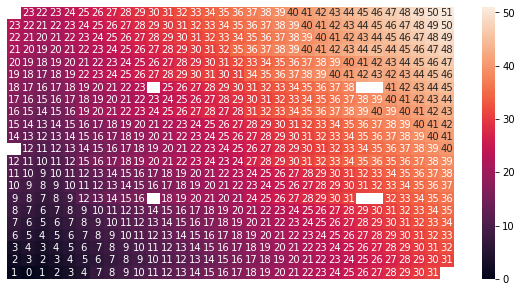

In [15]:
# [seaborn heatmap from pandas dataframe with NaNs]
# (https://stackoverflow.com/a/53799587/12224183)
plt.rcParams['figure.figsize'] = [10, 5]
sns.heatmap(np.flip(distance.T, axis=0), 
            annot=True, 
            fmt=".0f",
            mask=np.flip(distance.T, axis=0) == np.inf)
plt.axis('off')
plt.savefig('images/distance.png', bbox_inches='tight')

## 4d distance

In [424]:
distance_p2p = np.inf * np.ones([x_lim, y_lim, x_lim, y_lim], dtype=float)
for rx in range(x_lim):
    for ry in range(y_lim):
        distance = np.inf * np.ones([x_lim, y_lim], dtype=float)
        distance[rx, ry] = 0
        explored = {(rx, ry)}  # those distances are calculated
        unexplored = nbr_array[rx, ry].copy()  # those distances are not calculated; if not copy nbr_array may change!!
        while unexplored:
            ux, uy = unexplored.pop()
            temp_distance = []
            for x_, y_ in (ux + 1, uy), (ux - 1, uy), (ux, uy + 1), (ux, uy - 1):
                if -1 < x_ < x_lim and -1 < y_ < y_lim and (ux, uy) in nbr_array[x_, y_] \
                and (x_, y_) not in unexplored:
                # (x_, y_) → (ux, uy), distance from unexplored must be larger
                    temp_distance.append(distance[x_, y_] + 1)
            if temp_distance:
                distance[ux, uy] = min(temp_distance)
                explored.add((ux, uy))  # distance calculated, do not change
                for nx, ny in nbr_array[ux, uy]:
                    if (nx, ny) not in explored:
                        unexplored.add((nx, ny))
        distance_p2p[rx, ry] = distance

In [428]:
distance_p2p[1, 0, 0, 0], distance_p2p[1, 0, 1, 1], distance_p2p[1, 0, 2, 0]

(1.0, 3.0, 1.0)

In [429]:
np.save('save/distance_p2p.npy', distance_p2p)

In [436]:
eq = 0
ne = 0
for x in range(x_lim):
    for y in range(y_lim):
        for s in range(x_lim):
            for t in range(y_lim):
                if distance_p2p[x, y, s, t] != distance_p2p[s, t, x, y]:
                    print('({}, {}) → ({}, {}): {}, ({}, {}) → ({}, {}): {}'.format(
                    x, y, s, t, distance_p2p[x, y, s, t], s, t, x, y, distance_p2p[s, t, x, y]))
                    ne += 1
                else:
                    eq += 1
eq, ne

(0, 0) → (0, 19): 21.0, (0, 19) → (0, 0): 23.0
(0, 0) → (0, 20): 22.0, (0, 20) → (0, 0): 24.0
(0, 0) → (1, 0): 3.0, (1, 0) → (0, 0): 1.0
(0, 0) → (1, 21): 22.0, (1, 21) → (0, 0): 24.0
(0, 0) → (2, 19): 21.0, (2, 19) → (0, 0): 23.0
(0, 0) → (7, 19): 26.0, (7, 19) → (0, 0): 28.0
(0, 0) → (8, 2): 10.0, (8, 2) → (0, 0): 12.0
(0, 0) → (9, 9): 20.0, (9, 9) → (0, 0): 22.0
(0, 0) → (11, 0): 19.0, (11, 0) → (0, 0): 13.0
(0, 0) → (11, 1): 18.0, (11, 1) → (0, 0): 12.0
(0, 0) → (11, 2): 17.0, (11, 2) → (0, 0): 13.0
(0, 0) → (11, 3): 16.0, (11, 3) → (0, 0): 14.0
(0, 0) → (12, 0): 20.0, (12, 0) → (0, 0): 16.0
(0, 0) → (12, 1): 19.0, (12, 1) → (0, 0): 13.0
(0, 0) → (12, 2): 18.0, (12, 2) → (0, 0): 14.0
(0, 0) → (12, 3): 17.0, (12, 3) → (0, 0): 15.0
(0, 0) → (12, 16): 30.0, (12, 16) → (0, 0): 32.0
(0, 0) → (12, 17): 29.0, (12, 17) → (0, 0): 31.0
(0, 0) → (13, 0): 21.0, (13, 0) → (0, 0): 15.0
(0, 0) → (13, 1): 20.0, (13, 1) → (0, 0): 14.0
(0, 0) → (13, 2): 19.0, (13, 2) → (0, 0): 15.0
(0, 0) → (13, 3):

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

